In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/First_ML_Model/master/titanic.csv')

### Overview
The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history.

The training-set has 891 examples and 11 input variables + the target variable (survived). We have uploaded the dataset here and can be directly accessed with Pandas read_csv().

Feature Description:

    PassengerId - this is just a generated Id of each passenger
    Pclass - which class did the passenger ride in - first, second or third
    Name
    Sex - male or female
    Age
    SibSp - were the passenger's spouse or siblings with them on the ship
    Parch - were the passenger's parents or children with them on the ship
    Ticket - ticket number
    Fare - ticket price
    Cabin
    Embarked - port of embarkation
    Survived - did the passenger survive the sinking of the Titanic?

Objective: The broader objective is to build a model that would predict the survival probability of a person, given their basic features. In this exercise, you only need to focus on the Exploratory Data Analysis step.


In [17]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


###### 1. Select the correct statement about the titanic dataset.
 ->The 'Fare'feature has 0 missing values. []
 
 ->The no. of male passengers are more than female passengers. []
 
 ->All of above. [This is true.]
 

In [31]:
sex_count = dict(df.Sex.value_counts()) 
print('The number male passenger is : ',sex_count['male'],'.\nThe number of female passenger is : ',sex_count['female'],'.')
print('The Fare has ',df.Fare.isna().sum(),' missing values.')

The number male passenger is :  577 .
The number of female passenger is :  314 .
The Fare has  0  missing values.


###### 2. What is the proportion of passengers who survived?
In this question, we are asking for an answer as a proportion. Therefore, your answer should take a value between 0 and 1 rounded to 2 decimal places.

-> 0.38 [This is true.]

-> 0.39 []

-> 0.40 []

-> 0.41 []

In [4]:
survived_count = dict(df.Survived.value_counts())
survived_proportion = survived_count[1]/(survived_count[0]+survived_count[1])
print(round(survived_proportion,2))

0.38


###### 3. What is the median Fare of the passengers?   
Note: Write your answer up to 4 decimal places

->14.4542[This is true.]

->13.4542[]

->32.2042[]

->None of the above[]

In [5]:
np.median(df.Fare)

14.4542

###### 4. Select the correct option:

-> Percentage of women survived was more than that of men survived.[]

-> It looks like first-class passengers were given priority to survive.[]

-> It looks like Children were given priority to survive.[]

->All of the above[This is true].

Survival percentage for men :  18.89
Survival percentage for women :  74.2
1    136
3    119
2     87
Name: Pclass, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


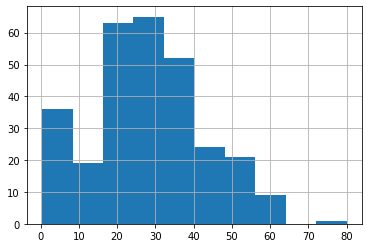

In [63]:
survived_passengers = df[df.Survived == 1]
sur_male = len(survived_passengers[survived_passengers.Sex == 'male'])
sur_female = len(survived_passengers[survived_passengers.Sex == 'female'])
print("Survival percentage for men : ", round(sur_male/sex_count["male"]*100,2))
print("Survival percentage for women : ", round(sur_female/sex_count["female"]*100,2))

print(survived_passengers.Pclass.value_counts())

print(survived_passengers.Age.hist())


###### 5. Create a subset of the data, only taking observations for which the passsenger survived. Call this newly created dataset as survived_passengers.

How many of the survived passengers had embarked from 'Southampton' i.e. 'S'?

-> 644 []

-> 217 [This is true]

->168 []
 
->77 []

In [28]:

from_southhamp = survived_passengers[survived_passengers.Embarked == 'S']
#print(from_southhamp.head())
len(from_southhamp)

217

###### 6. Five highest fares of the passengers(not unique).

-> 512.3292, 512.3292, 512.3292, 263.0, 263.0 [This is true]

-> 510.3292, 512.3292, 512.3292, 263.0, 263.0 []

-> 512.3292, 512.3292, 512.3292, 263.0, 256.0 []

-> 512.3292, 520.3292, 512.3292, 263.0, 263.0 []


In [9]:
list(df.Fare.nlargest(5))

[512.3292, 512.3292, 512.3292, 263.0, 263.0]

###### 7. Median age of the passengers is:

-> 27.0 []

-> 28.0 [This is true]

-> 29.0 []

->30.0 []

In [18]:
new_age = df.Age.dropna()
np.median(new_age)

28.0

###### 8. Select the correct statement:

-> There are 891 unique values in the Name column. [This is true]

-> There are 714 unique values in the Name column. [] 

In [29]:
df.Name.nunique()

891

###### 9. Most of the passengers have ______ siblings/spouses.

-> 5 []

-> 1 []

-> 0 [This is true]

-> 2 []

In [21]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

###### 10. Which of the following feature plays an important role in the survival of the passengers?

-> Name []

-> Age []

-> Ticket []

<AxesSubplot:>

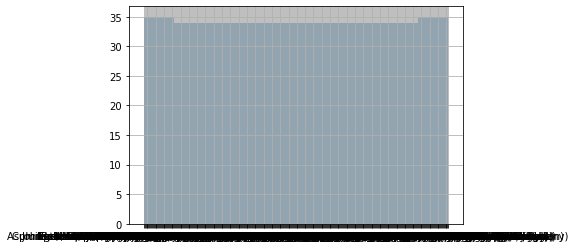

In [37]:
survived_passengers.Name.hist()#we can see almost no influence of names

<AxesSubplot:>

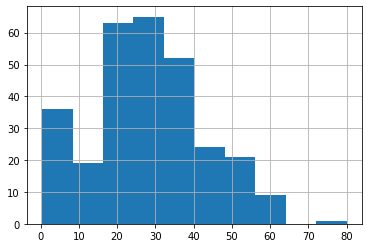

In [40]:
survived_passengers.Age.hist()#we can clearly see that people in thier 20s were more than other survivors

<AxesSubplot:>

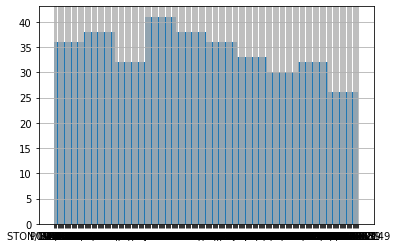

In [46]:
survived_passengers.Ticket.hist()#There is no clear relation